1. Set Up the Environment in Google Colab:
Open Colab and set up the necessary packages like Pandas, NumPy, TensorFlow, and Matplotlib for analysis and visualization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM



2. Load the Dataset:
You can upload the data using files.upload() or import it from Google Drive if needed.

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the data into a DataFrame
df = pd.read_csv('GOOG.csv')  # replace with your file name
df.head()


Saving GOOG.csv to GOOG.csv


NameError: name 'pd' is not defined

3. Data Preprocessing:
Convert the Date column to datetime and ensure the data is sorted by date. Also, normalize the stock prices using MinMaxScaler.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Use only the 'Close' prices for prediction
close_data = df[['close']].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]


4. Create Time Series Sequences:
Prepare the data to be fed into the LSTM model by creating sequences of time steps (usually 60 days).

In [ ]:
def create_s

# Create sequences
X_train, Y_train = create_sequences(train_data)
X_test, Y_test = create_sequences(test_data)


5. Build the LSTM Model:
Define a sequential LSTM model to process the sequential data and predict the stock price.

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, Y_train, batch_size=64, epochs=10)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0142
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0020
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 9.0936e-04
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 5.3931e-04
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 5.0846e-04
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 4.2225e-04
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 5.1097e-04
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - loss: 4.5963e-04
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 4.3116e-04
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 4.5155e-04


6. Make Predictions:
Once the model is trained, make predictions on the test set and inverse the scaling to get the actual prices.

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


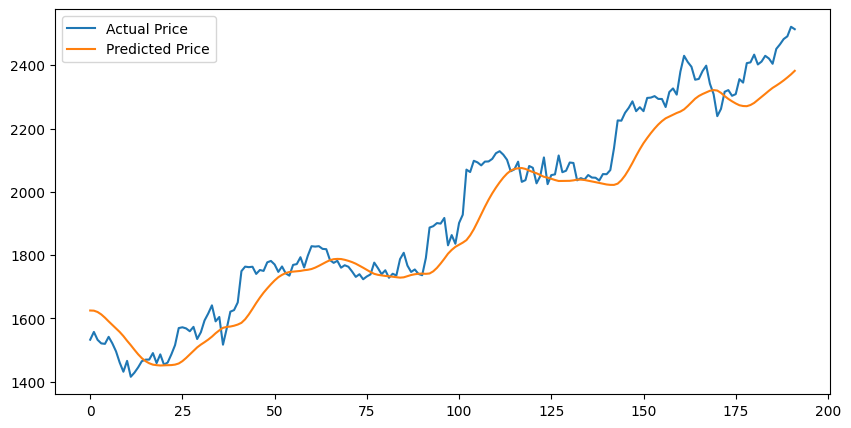

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Inverse transform Y_test for comparison
Y_test = scaler.inverse_transform(Y_test)

# Plot the predictions vs actual prices
plt.figure(figsize=(10,5))
plt.plot(Y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.show()


7. Evaluate Performance:
To assess the model's performance, you can compute evaluation metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE).

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 7419.548443627871


.................................................................................................................

..................................................................................................................................................................Visualization..............................................


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the data into a DataFrame
df = pd.read_csv('GOOG.csv')  # replace with your file name
df.head()


Saving GOOG.csv to GOOG (1).csv


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
# Check for missing values and info
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


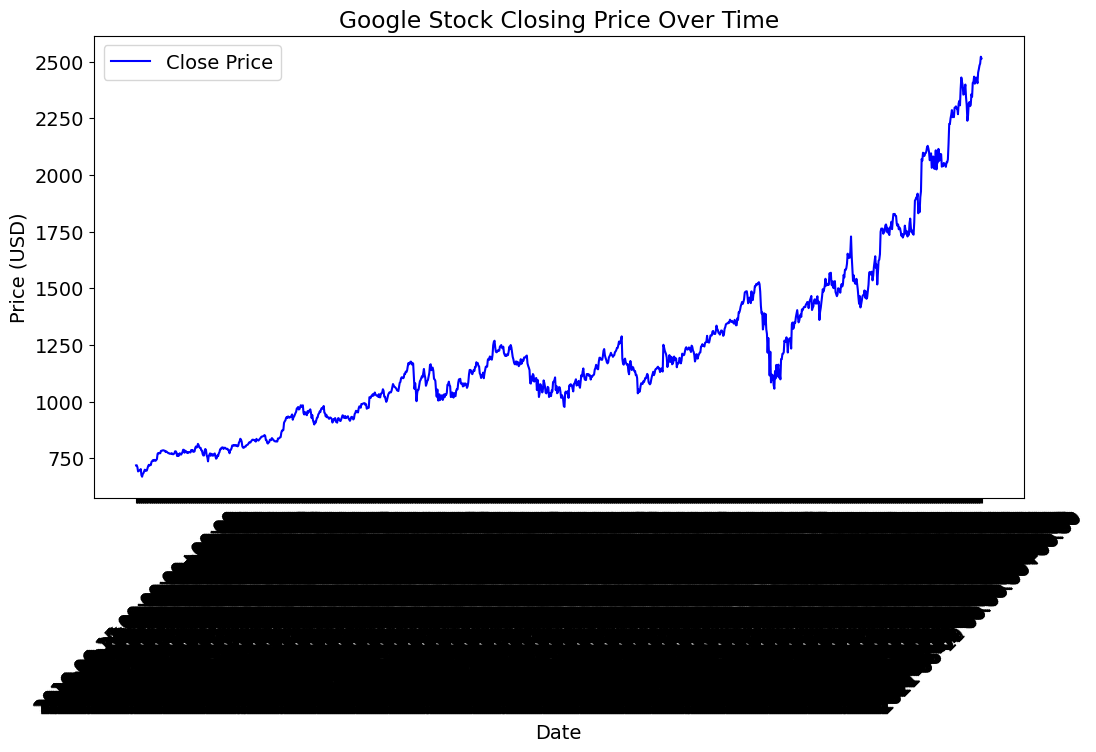

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.title('Google Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


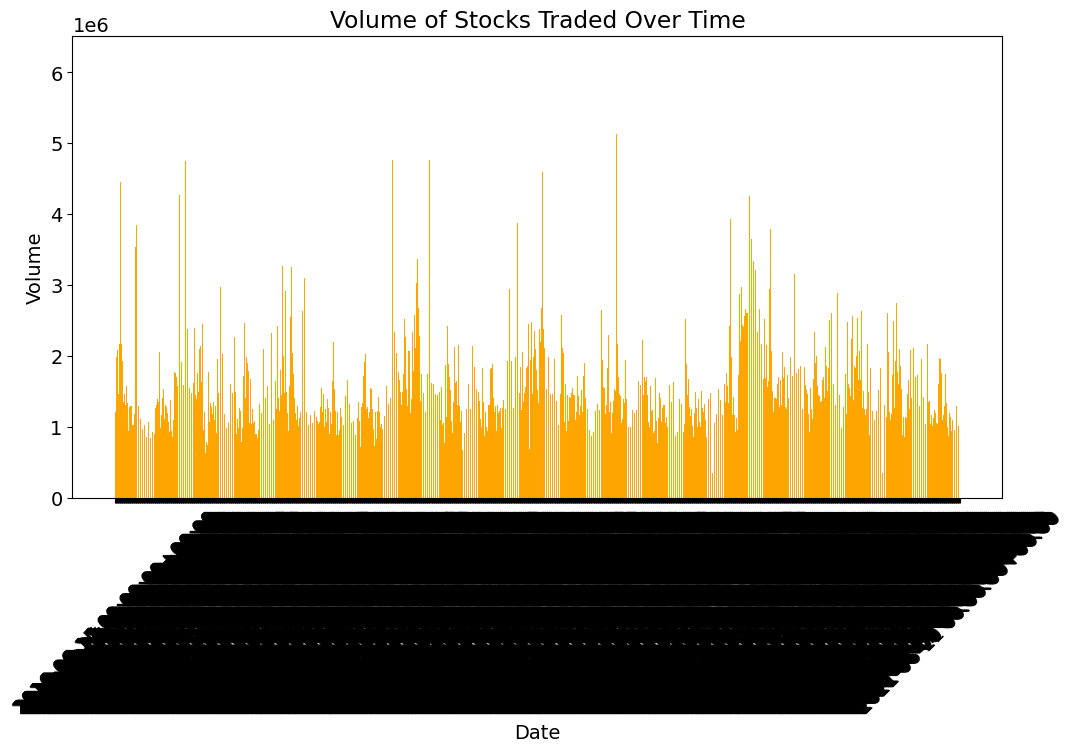

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(df['date'], df['volume'], color='orange')
plt.title('Volume of Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()
